## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

## CPT DATASET

In [2]:
df = pd.read_excel('Datasets/CPT Dataset.xlsx')

In [3]:
df.head(5)

,Earthquake,Liq,"qc1N,cs",CSR7.5
0,1964 M=7.6 Niigata ‐ June 16,Yes,61.2,0.161
1,1964 M=7.6 Niigata ‐ June 16,Yes,51.1,0.138
2,1964 M=7.6 Niigata ‐ June 16,No,152.1,0.154
3,"1968 Inangahua, New Zealand ‐ May 23",Yes,54.7,0.358
4,"1968 Inangahua, New Zealand ‐ May 23",Yes,31.5,0.177


In [4]:
df['Liq'] = pd.get_dummies(df['Liq'], drop_first = True)
df['ln(CSR7.5)'] = np.log(df['CSR7.5'])

In [5]:
df.head(5)

,Earthquake,Liq,"qc1N,cs",CSR7.5,ln(CSR7.5)
0,1964 M=7.6 Niigata ‐ June 16,1,61.2,0.161,-1.826351
1,1964 M=7.6 Niigata ‐ June 16,1,51.1,0.138,-1.980502
2,1964 M=7.6 Niigata ‐ June 16,0,152.1,0.154,-1.870803
3,"1968 Inangahua, New Zealand ‐ May 23",1,54.7,0.358,-1.027222
4,"1968 Inangahua, New Zealand ‐ May 23",1,31.5,0.177,-1.731606


In [6]:
df[["qc1N,cs","CSR7.5","Liq"]].describe()

,"qc1N,cs",CSR7.5,Liq
count,251.000000,251.000000,251.000000
mean,94.020319,0.248486,0.717131
std,37.819284,0.119958,0.451293
min,16.100000,0.062000,0.000000
25%,71.250000,0.158000,0.000000
50%,85.900000,0.223000,1.000000
75%,112.450000,0.295000,1.000000
max,311.900000,0.646000,1.000000


<AxesSubplot:xlabel='qc1N,cs', ylabel='CSR7.5'>

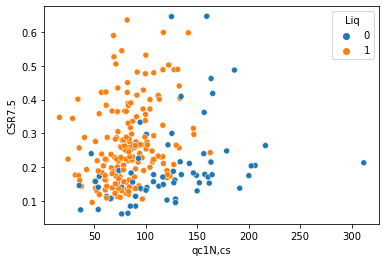

In [7]:
sn.scatterplot(x = df['qc1N,cs'], y = df['CSR7.5'], hue = df['Liq'])


In [8]:
df.Liq.value_counts()

1    180
0     71
Name: Liq, dtype: int64

In [9]:
df.describe()

,Liq,"qc1N,cs",CSR7.5,ln(CSR7.5)
count,251.000000,251.000000,251.000000,251.000000
mean,0.717131,94.020319,0.248486,-1.500800
std,0.451293,37.819284,0.119958,0.467360
min,0.000000,16.100000,0.062000,-2.780621
25%,0.000000,71.250000,0.158000,-1.845160
50%,1.000000,85.900000,0.223000,-1.500584
75%,1.000000,112.450000,0.295000,-1.220803
max,1.000000,311.900000,0.646000,-0.436956


In [10]:
features = df[['qc1N,cs','CSR7.5']]
target = df['Liq']

In [11]:
def MinMaxNormalization(data):
    # MinMax Normalization
    scaler = MinMaxScaler()
    # fit scaler on data
    scaler.fit(data)
    # apply transform
    minmax_normalized = scaler.transform(data)
    return minmax_normalized

## Using Pre-trained model

In [12]:
normalized_features = MinMaxNormalization(features)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size = 0.8)

In [14]:
# loading the previously saved model.
pre_trained_model = tf.keras.models.load_model('main_model.h5')
pre_trained_model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8600
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8600
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.8600
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8600
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8600
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8600
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8600
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8600
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8600
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8600
Epoch 11/500
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8800
Epoch 85/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8800
Epoch 86/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8800
Epoch 87/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8800
Epoch 88/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8800
Epoch 89/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8800
Epoch 90/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8800
Epoch 91/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8800
Epoch 92/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8800
Epoch 93/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8800
Epoch 94/500
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8600
Epoch 168/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8600
Epoch 169/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8600
Epoch 170/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8600
Epoch 171/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8600
Epoch 172/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8600
Epoch 173/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8800
Epoch 174/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8800
Epoch 175/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8800
Epoch 176/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8800
Epoch 177/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.9000
Epoch 250/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.9000
Epoch 251/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.9000
Epoch 252/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.9200
Epoch 253/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.9200
Epoch 254/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.9200
Epoch 255/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.9200
Epoch 256/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.9200
Epoch 257/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.9200
Epoch 258/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.9200
Epoch 259/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.9200
Epoch 332/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.9200
Epoch 333/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9200
Epoch 334/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9200
Epoch 335/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9200
Epoch 336/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9200
Epoch 337/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.9200
Epoch 338/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.9200
Epoch 339/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.9200
Epoch 340/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.9200
Epoch 341/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.9200
Epoch 414/500
2/2 [==============================] - 0s 995us/step - loss: 0.3459 - accuracy: 0.9200
Epoch 415/500
2/2 [==============================] - 0s 996us/step - loss: 0.3459 - accuracy: 0.9200
Epoch 416/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.9200
Epoch 417/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.9200
Epoch 418/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9200
Epoch 419/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.9200
Epoch 420/500
2/2 [==============================] - 0s 995us/step - loss: 0.3457 - accuracy: 0.9200
Epoch 421/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9200
Epoch 422/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.9200
Epoch 423/500
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.9200
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.9200
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.9200
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.9200
Epoch 499/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.9200
Epoch 500/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.9200


In [15]:
test_loss, test_accuracy = pre_trained_model.evaluate(normalized_features, target)

8/8 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8127


In [16]:
y_predictions = pre_trained_model.predict(normalized_features)

In [17]:
for i in range(len(y_predictions)):
    if y_predictions[i] < 0.5:
        y_predictions[i] = 0
    else:
        y_predictions[i] = 1

In [18]:
print("ACCURACY = ",accuracy_score(target, y_predictions))
print("RECALL = ",recall_score(target, y_predictions))
print("PRECISION = ",precision_score(target, y_predictions))
print("F1-Score = ",f1_score(target, y_predictions))

ACCURACY =  0.8127490039840638
RECALL =  0.8611111111111112
PRECISION =  0.8757062146892656
F1-Score =  0.8683473389355743


<AxesSubplot:>

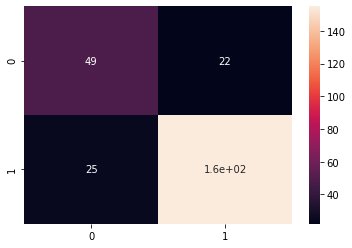

In [19]:
sn.heatmap(confusion_matrix(target, y_predictions), annot = True)

In [20]:
#Cross Validation Score


kf = KFold(n_splits = 5, shuffle = True)
accuracies = []
recalls = []
precisions = []
f1scores = []
for train, test in kf.split(df[['qc1N,cs','CSR7.5','Liq']]):
    
    train_df = df.loc[train]
    test_df = df.loc[test]
    
    print(len(train_df))
    print(len(test_df))

    pre_trained_model = tf.keras.models.load_model('main_model.h5')
    pre_trained_model.fit(MinMaxNormalization(test_df[['qc1N,cs','CSR7.5']]), test_df['Liq'], epochs = 500)

    y_predictions = pre_trained_model.predict(MinMaxNormalization(train_df[['qc1N,cs','CSR7.5']]))
    for i in range(len(y_predictions)):
        if y_predictions[i] < 0.5:
            y_predictions[i] = 0
        else:
            y_predictions[i] = 1

    accuracies.append(accuracy_score(train_df['Liq'], y_predictions))
    recalls.append(recall_score(train_df['Liq'], y_predictions))
    precisions.append(precision_score(train_df['Liq'], y_predictions))
    f1scores.append(f1_score(train_df['Liq'], y_predictions))

print("Accuracies:", accuracies)
print("Recalls:", recalls)
print("f1scores:", f1scores)
print("precisions:", precisions)


200
51
Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6667
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 0.6340 - accuracy: 0.6667
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6667
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.6667
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6667
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.6667
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.6863
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6863
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6863
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7059
Epoch 11/500
2/2 [====

2/2 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8039
Epoch 85/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.8039
Epoch 86/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.8039
Epoch 87/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.8039
Epoch 88/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8039
Epoch 89/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.8039
Epoch 90/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.8039
Epoch 91/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.8039
Epoch 92/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.8039
Epoch 93/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.8039
Epoch 94/500
2/2 [===============

Epoch 167/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8039
Epoch 168/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.8039
Epoch 169/500
2/2 [==============================] - 0s 998us/step - loss: 0.5350 - accuracy: 0.8039
Epoch 170/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8039
Epoch 171/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.8039
Epoch 172/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.8039
Epoch 173/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.8039
Epoch 174/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.8235
Epoch 175/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.8235
Epoch 176/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.8235
Epoch 17

2/2 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8235
Epoch 250/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8235
Epoch 251/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8235
Epoch 252/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8235
Epoch 253/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8235
Epoch 254/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8235
Epoch 255/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8235
Epoch 256/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8235
Epoch 257/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.8235
Epoch 258/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8235
Epoch 259/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.8235
Epoch 332/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8235
Epoch 333/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8235
Epoch 334/500
2/2 [==============================] - 0s 997us/step - loss: 0.5253 - accuracy: 0.8235
Epoch 335/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8235
Epoch 336/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8235
Epoch 337/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8235
Epoch 338/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8235
Epoch 339/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8235
Epoch 340/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.8235
Epoch 341/500
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.8235
Epoch 414/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.8235
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8235
Epoch 416/500
2/2 [==============================] - 0s 999us/step - loss: 0.5236 - accuracy: 0.8235
Epoch 417/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8235
Epoch 418/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8235
Epoch 419/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8235
Epoch 420/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.8235
Epoch 421/500
2/2 [==============================] - 0s 992us/step - loss: 0.5237 - accuracy: 0.8235
Epoch 422/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.8235
Epoch 423/500
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8235
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8235
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.8235
Epoch 498/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.8235
Epoch 499/500
2/2 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.8235
Epoch 500/500
2/2 [==============================] - 0s 11ms/step - loss: 0.5226 - accuracy: 0.8235
201
50
Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8400
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8400
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8400
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8400
Epoch 5/500
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8800
Epoch 79/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8800
Epoch 80/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8800
Epoch 81/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8800
Epoch 82/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8800
Epoch 83/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8800
Epoch 84/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8800
Epoch 85/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8800
Epoch 86/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8800
Epoch 87/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8800
Epoch 88/500
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8600
Epoch 162/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8600
Epoch 163/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8600
Epoch 164/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8600
Epoch 165/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8600
Epoch 166/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8600
Epoch 167/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8600
Epoch 168/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8600
Epoch 169/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8600
Epoch 170/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8600
Epoch 171/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8600
Epoch 244/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8600
Epoch 245/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8600
Epoch 246/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8600
Epoch 247/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8600
Epoch 248/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8600
Epoch 249/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8600
Epoch 250/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8600
Epoch 251/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8600
Epoch 252/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8600
Epoch 253/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8600
Epoch 326/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8600
Epoch 327/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8600
Epoch 328/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8600
Epoch 329/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8600
Epoch 330/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8600
Epoch 331/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8600
Epoch 332/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8600
Epoch 333/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8600
Epoch 334/500
2/2 [==============================] - 0s 999us/step - loss: 0.3153 - accuracy: 0.8600
Epoch 335/500
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8600
Epoch 408/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8600
Epoch 409/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8600
Epoch 410/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8600
Epoch 411/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8600
Epoch 412/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3092 - accuracy: 0.8600
Epoch 413/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8600
Epoch 414/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8600
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8600
Epoch 416/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8600
Epoch 417/500
2/2 [=====

2/2 [==============================] - 0s 992us/step - loss: 0.3061 - accuracy: 0.8600
Epoch 490/500
2/2 [==============================] - 0s 992us/step - loss: 0.3061 - accuracy: 0.8600
Epoch 491/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8600
Epoch 492/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8600
Epoch 493/500
2/2 [==============================] - 0s 995us/step - loss: 0.3060 - accuracy: 0.8600
Epoch 494/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8600
Epoch 495/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8600
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8600
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8600
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8600
Epoch 499/500
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8800
Epoch 73/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8800
Epoch 74/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8800
Epoch 75/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8800
Epoch 76/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8800
Epoch 77/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8800
Epoch 78/500
2/2 [==============================] - 0s 997us/step - loss: 0.3701 - accuracy: 0.8800
Epoch 79/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8800
Epoch 80/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8800
Epoch 81/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8800
Epoch 82/500
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.3564 - accuracy: 0.8800
Epoch 156/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8800
Epoch 157/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8800
Epoch 158/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8800
Epoch 159/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8800
Epoch 160/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8800
Epoch 161/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.8800
Epoch 162/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8800
Epoch 163/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8800
Epoch 164/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8800
Epoch 165/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8800
Epoch 238/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8800
Epoch 239/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8800
Epoch 240/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8800
Epoch 241/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8800
Epoch 242/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8800
Epoch 243/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8800
Epoch 244/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8800
Epoch 245/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8800
Epoch 246/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8800
Epoch 247/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8800
Epoch 319/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8800
Epoch 320/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8800
Epoch 321/500
2/2 [==============================] - 0s 999us/step - loss: 0.3339 - accuracy: 0.8800
Epoch 322/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8800
Epoch 323/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8800
Epoch 324/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8800
Epoch 325/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.8800
Epoch 326/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8800
Epoch 327/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8800
Epoch 328/500
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8800
Epoch 401/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8800
Epoch 402/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8800
Epoch 403/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8800
Epoch 404/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8800
Epoch 405/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8800
Epoch 406/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8800
Epoch 407/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8800
Epoch 408/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8800
Epoch 409/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8800
Epoch 410/500
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8800
Epoch 483/500
2/2 [==============================] - 0s 986us/step - loss: 0.3041 - accuracy: 0.8800
Epoch 484/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8800
Epoch 485/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8800
Epoch 486/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8800
Epoch 487/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8800
Epoch 488/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8800
Epoch 489/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8800
Epoch 490/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.8800
Epoch 491/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8800
Epoch 492/500
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8200
Epoch 66/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.8200
Epoch 67/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8200
Epoch 68/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.8200
Epoch 69/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.8200
Epoch 70/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8200
Epoch 71/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8200
Epoch 72/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8200
Epoch 73/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8200
Epoch 74/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.8200
Epoch 75/500
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8400
Epoch 149/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.8400
Epoch 150/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8400
Epoch 151/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.8400
Epoch 152/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8400
Epoch 153/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8400
Epoch 154/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.8400
Epoch 155/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.8400
Epoch 156/500
2/2 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.8400
Epoch 157/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8400
Epoch 158/500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.4540 - accuracy: 0.8400
Epoch 231/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8400
Epoch 232/500
2/2 [==============================] - 0s 6ms/step - loss: 0.4540 - accuracy: 0.8400
Epoch 233/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8400
Epoch 234/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.8400
Epoch 235/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.8400
Epoch 236/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.8400
Epoch 237/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.8400
Epoch 238/500
2/2 [==============================] - 0s 998us/step - loss: 0.4535 - accuracy: 0.8400
Epoch 239/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8400
Epoch 240/500
2/2 [===

2/2 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.8400
Epoch 313/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8400
Epoch 314/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8400
Epoch 315/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.8400
Epoch 316/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8400
Epoch 317/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8400
Epoch 318/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8400
Epoch 319/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8400
Epoch 320/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8400
Epoch 321/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8400
Epoch 322/500
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8400
Epoch 395/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8400
Epoch 396/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8400
Epoch 397/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.8400
Epoch 398/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8400
Epoch 399/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8400
Epoch 400/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8400
Epoch 401/500
2/2 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.8400
Epoch 402/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8400
Epoch 403/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8400
Epoch 404/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8600
Epoch 477/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8600
Epoch 478/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8600
Epoch 479/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8600
Epoch 480/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8600
Epoch 481/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8600
Epoch 482/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8600
Epoch 483/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8600
Epoch 484/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8600
Epoch 485/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8600
Epoch 486/500
2/2 [=====

2/2 [==============================] - 0s 1000us/step - loss: 0.3547 - accuracy: 0.8600
Epoch 60/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8600
Epoch 61/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8600
Epoch 62/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8600
Epoch 63/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8600
Epoch 64/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8600
Epoch 65/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8600
Epoch 66/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8600
Epoch 67/500
2/2 [==============================] - 0s 999us/step - loss: 0.3533 - accuracy: 0.8600
Epoch 68/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8600
Epoch 69/500
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8600
Epoch 143/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8600
Epoch 144/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8600
Epoch 145/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8600
Epoch 146/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8600
Epoch 147/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8600
Epoch 148/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8800
Epoch 149/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8800
Epoch 150/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8600
Epoch 151/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8600
Epoch 152/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8600
Epoch 225/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8800
Epoch 226/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3433 - accuracy: 0.8800
Epoch 227/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8600
Epoch 228/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8800
Epoch 229/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8800
Epoch 230/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8800
Epoch 231/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8800
Epoch 232/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8800
Epoch 233/500
2/2 [==============================] - 0s 994us/step - loss: 0.3432 - accuracy: 0.8800
Epoch 234/500
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8800
Epoch 307/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8800
Epoch 308/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8800
Epoch 309/500
2/2 [==============================] - 0s 992us/step - loss: 0.3423 - accuracy: 0.8800
Epoch 310/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8800
Epoch 311/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8800
Epoch 312/500
2/2 [==============================] - 0s 999us/step - loss: 0.3421 - accuracy: 0.8800
Epoch 313/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8800
Epoch 314/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8800
Epoch 315/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8800
Epoch 316/500
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8600
Epoch 389/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8600
Epoch 390/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8600
Epoch 391/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8600
Epoch 392/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8600
Epoch 393/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.8600
Epoch 394/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8600
Epoch 395/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8600
Epoch 396/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8600
Epoch 397/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8600
Epoch 398/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 471/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8800
Epoch 472/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 473/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8800
Epoch 474/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 475/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8800
Epoch 476/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 477/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 478/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 479/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8800
Epoch 480/500
2/2 [=====

In [21]:
################ Without fine-tuning the model, Here are the metrics values: ################
# ACCURACY =  0.8326693227091634
# RECALL =  0.9222222222222223

## Using Robertson Wride Model

In [22]:
df_robertson = pd.read_excel('Datasets/CPT Dataset.xlsx')

In [23]:
df_robertson.head(5)

,Earthquake,Liq,"qc1N,cs",CSR7.5
0,1964 M=7.6 Niigata ‐ June 16,Yes,61.2,0.161
1,1964 M=7.6 Niigata ‐ June 16,Yes,51.1,0.138
2,1964 M=7.6 Niigata ‐ June 16,No,152.1,0.154
3,"1968 Inangahua, New Zealand ‐ May 23",Yes,54.7,0.358
4,"1968 Inangahua, New Zealand ‐ May 23",Yes,31.5,0.177


In [24]:
df_robertson = pd.get_dummies(df_robertson, columns = ['Liq'], drop_first = True)
df_robertson.rename(columns = {'Liq_Yes':'Liq'}, inplace = True)

In [25]:
df_robertson.head(5)

,Earthquake,"qc1N,cs",CSR7.5,Liq
0,1964 M=7.6 Niigata ‐ June 16,61.2,0.161,1
1,1964 M=7.6 Niigata ‐ June 16,51.1,0.138,1
2,1964 M=7.6 Niigata ‐ June 16,152.1,0.154,0
3,"1968 Inangahua, New Zealand ‐ May 23",54.7,0.358,1
4,"1968 Inangahua, New Zealand ‐ May 23",31.5,0.177,1


In [26]:
for i, qc1Ncs in df_robertson['qc1N,cs'].iteritems():
    if qc1Ncs < 50:
        df_robertson.loc[i,'CRR7.5'] = (0.833 * (qc1Ncs/1000)) + 0.05
    else:
        if qc1Ncs >= 50:
            df_robertson.loc[i,'CRR7.5'] = (93 * (qc1Ncs/1000) ** 3) + 0.08

In [27]:
df_robertson.head(5)

,Earthquake,"qc1N,cs",CSR7.5,Liq,CRR7.5
0,1964 M=7.6 Niigata ‐ June 16,61.2,0.161,1,0.101318
1,1964 M=7.6 Niigata ‐ June 16,51.1,0.138,1,0.092409
2,1964 M=7.6 Niigata ‐ June 16,152.1,0.154,0,0.407243
3,"1968 Inangahua, New Zealand ‐ May 23",54.7,0.358,1,0.095221
4,"1968 Inangahua, New Zealand ‐ May 23",31.5,0.177,1,0.076240


In [28]:
for i in range(len(df_robertson)):
    if df_robertson.loc[i, 'CRR7.5'] > df_robertson.loc[i, 'CSR7.5'] :
        df_robertson.loc[i, 'predicted_liquified'] = 0
    else:
        df_robertson.loc[i, 'predicted_liquified'] = 1

In [29]:
df_robertson.sample(5)

,Earthquake,"qc1N,cs",CSR7.5,Liq,CRR7.5,predicted_liquified
199,2011 M‐6.2 Christchurch ‐ Feb 22,83.8,0.284,1,0.134729,1.0
73,1989 M=6.9 Loma Prieta ‐ Oct 18,51.0,0.161,1,0.092337,1.0
70,1989 M=6.9 Loma Prieta ‐ Oct 18,191.3,0.138,0,0.731070,0.0
123,1989 M=6.9 Loma Prieta ‐ Oct 18,163.4,0.215,0,0.485732,0.0
227,2011 M‐6.2 Christchurch ‐ Feb 22,83.5,0.245,1,0.134143,1.0


In [30]:
print("Robertson Wride Accuracy: ", accuracy_score(df_robertson['Liq'], df_robertson['predicted_liquified']))
print("Robertson Wride Recall: ", recall_score(df_robertson['Liq'], df_robertson['predicted_liquified']))
print("Robertson Wride precision: ", precision_score(df_robertson['Liq'], df_robertson['predicted_liquified']))
print("Robertson Wride f1-score: ", f1_score(df_robertson['Liq'], df_robertson['predicted_liquified']))

Robertson Wride Accuracy:  0.8286852589641435
Robertson Wride Recall:  0.8888888888888888
Robertson Wride precision:  0.8743169398907104
Robertson Wride f1-score:  0.8815426997245178


<AxesSubplot:>

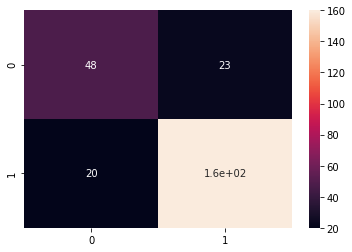

In [31]:
sn.heatmap(confusion_matrix(df_robertson['Liq'], df_robertson['predicted_liquified']), annot = True)

## Using Juang 2002 CPT-based Model

In [32]:
#Assessing Probability-based Methods for Liquefaction Potential Evaluation

In [33]:
PL_Juang = pd.DataFrame(1 / (1 + np.exp(-(12.4259 - (0.0498 * df['qc1N,cs']) + (3.9887 * df['ln(CSR7.5)']) ))), columns = ['PL'] )

In [34]:
for i in range(len(PL_Juang)):
    if PL_Juang.loc[i,'PL'] > 0.5:
        PL_Juang.loc[i,'Liq'] = 1
    else:
        PL_Juang.loc[i,'Liq'] = 0

In [35]:
PL_Juang.sample(5)

,PL,Liq
239,0.877047,1.0
187,0.998992,1.0
150,0.116096,0.0
17,0.227320,0.0
160,0.992931,1.0


In [36]:
print("Juang's accuracy: ", accuracy_score(df['Liq'], PL_Juang['Liq']))
print("Juang's recall: ", recall_score(df['Liq'], PL_Juang['Liq']))
print("Juang's precision: ", precision_score(df['Liq'], PL_Juang['Liq']))
print("Juang's f1-score: ", f1_score(df['Liq'], PL_Juang['Liq']))

Juang's accuracy:  0.848605577689243
Juang's recall:  0.95
Juang's precision:  0.855
Juang's f1-score:  0.8999999999999999


<AxesSubplot:>

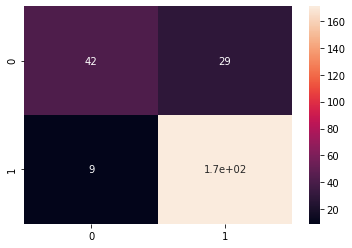

In [37]:
sn.heatmap(confusion_matrix(df['Liq'], PL_Juang['Liq']), annot = True)